# Water quality data

In [2]:
import pandas as pd

In [4]:
# well depth data
# Define filepath
filepath = 'C:/Users/mengj/OneDrive - lamar.edu/LectureNote2023/MLforCivilEng/TeamProject2/WoodbineWellDepth.xlsx'

df_welldepth = pd.read_excel(filepath)
df_welldepth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StateWellNumber  1389 non-null   int64  
 1   LatitudeDD       1389 non-null   float64
 2   Dlat             1389 non-null   int64  
 3   Mlat             1389 non-null   int64  
 4   Slat             1389 non-null   float64
 5   LongitudeDD      1389 non-null   float64
 6   Dlong            1389 non-null   int64  
 7   Mlong            1389 non-null   int64  
 8   Slong            1389 non-null   float64
 9   WellDepth        1376 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 108.6 KB


In [5]:
# drop nan
df_welldepth.dropna(axis=0, how='any', inplace=True)
# set StateWellNumber as index
df_welldepth.index = df_welldepth['StateWellNumber']
# resort by StateWellNumber
df_welldepth.sort_index(axis=0,ascending=True)

,StateWellNumber,LatitudeDD,Dlat,Mlat,Slat,LongitudeDD,Dlong,Mlong,Slong,WellDepth
StateWellNumber,,,,,,,,,,
1626601,1626601,33.545834,33,32,45.0,-94.780833,94,46,51.0,1320.0
1704801,1704801,33.915278,33,54,55.0,-95.571389,95,34,17.0,160.0
1710901,1710901,33.779167,33,46,45.0,-95.755278,95,45,19.0,100.0
1711901,1711901,33.755556,33,45,20.0,-95.647222,95,38,50.0,177.0
1712101,1712101,33.863889,33,51,50.0,-95.592778,95,35,34.0,165.0
...,...,...,...,...,...,...,...,...,...,...
4007501,4007501,31.921389,31,55,17.0,-97.181389,97,10,53.0,185.0
4008101,4008101,31.984167,31,59,3.0,-97.084722,97,5,5.0,480.0
4008202,4008202,31.988056,31,59,17.0,-97.076667,97,4,36.0,609.0


In [6]:
# water quality data
# Define filepath
filepath = 'C:/Users/mengj/OneDrive - lamar.edu/LectureNote2023/MLforCivilEng/TeamProject2/WoodbineWaterQuality.xlsx'

# Load Excel file using Pandas
f = pd.ExcelFile(filepath)

# Iterate through each worksheet
sheet = f.sheet_names
print(sheet)

['TDS', 'SAR', 'Hardness', 'Iron', 'Calcium', 'Magnesium', 'Sulfate', 'Chloride', 'Fluoride', 'pH']


In [7]:
df_woodbine = df_welldepth
for i in range(len(sheet)):
    df = f.parse(sheet[i])
    print('Before processing:')
    print(df.info())
    # set StateWellNumber as index
    df.index = df['StateWellNumber']
    # resort by StateWellNumber
    df.sort_index(axis=0,ascending=True)
    # calculate average for each state well
    df = df.groupby(df.index).mean()
    print('After processing:')
    print(df.info())
    df_woodbine = pd.concat([df_woodbine, df[df.columns[1]]], axis=1)

Before processing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784 entries, 0 to 1783
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   StateWellNumber  1784 non-null   int64         
 1   SampleDate       1771 non-null   datetime64[ns]
 2   TDS_mg/L         1784 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 41.9 KB
None
After processing:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 1712101 to 4008301
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StateWellNumber  742 non-null    float64
 1   TDS_mg/L         742 non-null    float64
dtypes: float64(2)
memory usage: 17.4 KB
None
Before processing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype     

In [8]:
df_woodbine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 1626601 to 3239101
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StateWellNumber  1376 non-null   float64
 1   LatitudeDD       1376 non-null   float64
 2   Dlat             1376 non-null   float64
 3   Mlat             1376 non-null   float64
 4   Slat             1376 non-null   float64
 5   LongitudeDD      1376 non-null   float64
 6   Dlong            1376 non-null   float64
 7   Mlong            1376 non-null   float64
 8   Slong            1376 non-null   float64
 9   WellDepth        1376 non-null   float64
 10  TDS_mg/L         742 non-null    float64
 11  SAR              738 non-null    float64
 12  Hardness_mg/L    785 non-null    float64
 13  Iron_ug/L        426 non-null    float64
 14  Calcium_mg/L     712 non-null    float64
 15  Magnesium_mg/L   712 non-null    float64
 16  Sulfate_mg/L     754 non-null    float64
 17  Chlor

In [9]:
df_woodbine.head(20)

,StateWellNumber,LatitudeDD,Dlat,Mlat,Slat,LongitudeDD,Dlong,Mlong,Slong,WellDepth,TDS_mg/L,SAR,Hardness_mg/L,Iron_ug/L,Calcium_mg/L,Magnesium_mg/L,Sulfate_mg/L,Chloride_mg/L,Fluoride_mg/L,pH
StateWellNumber,,,,,,,,,,,,,,,,,,,,
1626601,1626601.0,33.545834,33.0,32.0,45.00,-94.780833,94.0,46.0,51.00,1320.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1704801,1704801.0,33.915278,33.0,54.0,55.00,-95.571389,95.0,34.0,17.00,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1710901,1710901.0,33.779167,33.0,46.0,45.00,-95.755278,95.0,45.0,19.00,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1711901,1711901.0,33.755556,33.0,45.0,20.00,-95.647222,95.0,38.0,50.00,177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1712101,1712101.0,33.863889,33.0,51.0,50.00,-95.592778,95.0,35.0,34.00,165.0,190.000000,0.985000,96.500000,NaN,26.500000,7.365000,5.5,52.5,0.100000,6.350000
1712102,1712102.0,33.873055,33.0,52.0,23.00,-95.606112,95.0,36.0,22.00,103.0,528.333333,1.986667,291.166667,NaN,NaN,NaN,NaN,NaN,0.145000,6.376667
1712201,1712201.0,33.869722,33.0,52.0,11.00,-95.575833,95.0,34.0,33.00,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1712202,1712202.0,33.869444,33.0,52.0,10.00,-95.575278,95.0,34.0,31.00,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1712301,1712301.0,33.841945,33.0,50.0,31.00,-95.511389,95.0,30.0,41.00,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_woodbine.to_excel('C:/Users/mengj/OneDrive - lamar.edu/LectureNote2023/MLforCivilEng/TeamProject2/WoodbineDatawithNAN.xlsx')

In [11]:
# drop nan
df_woodbine2 = df_woodbine.copy()
df_woodbine2.dropna(axis=0, how='any', inplace=True)

In [12]:
df_woodbine2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 1717401 to 4008301
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StateWellNumber  410 non-null    float64
 1   LatitudeDD       410 non-null    float64
 2   Dlat             410 non-null    float64
 3   Mlat             410 non-null    float64
 4   Slat             410 non-null    float64
 5   LongitudeDD      410 non-null    float64
 6   Dlong            410 non-null    float64
 7   Mlong            410 non-null    float64
 8   Slong            410 non-null    float64
 9   WellDepth        410 non-null    float64
 10  TDS_mg/L         410 non-null    float64
 11  SAR              410 non-null    float64
 12  Hardness_mg/L    410 non-null    float64
 13  Iron_ug/L        410 non-null    float64
 14  Calcium_mg/L     410 non-null    float64
 15  Magnesium_mg/L   410 non-null    float64
 16  Sulfate_mg/L     410 non-null    float64
 17  Chlori

In [13]:
df_woodbine2.to_excel('C:/Users/mengj/OneDrive - lamar.edu/LectureNote2023/MLforCivilEng/TeamProject2/WoodbineData.xlsx')

In [14]:
# Compute correlations and plot correlation matrix

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df_variable = df_woodbine2[df_woodbine2.columns[9:20]]

corr = df_variable.corr(method='kendall')

display(corr)

,WellDepth,TDS_mg/L,SAR,Hardness_mg/L,Iron_ug/L,Calcium_mg/L,Magnesium_mg/L,Sulfate_mg/L,Chloride_mg/L,Fluoride_mg/L,pH
WellDepth,1.000000,0.353897,0.486699,-0.259941,-0.167585,-0.261249,-0.230918,0.238878,0.295338,0.374582,0.150905
TDS_mg/L,0.353897,1.000000,0.597144,0.087685,-0.159517,0.089844,0.071645,0.691382,0.684622,0.666099,0.076586
SAR,0.486699,0.597144,1.000000,-0.300896,-0.285506,-0.285089,-0.280411,0.419793,0.436823,0.621673,0.214113
Hardness_mg/L,-0.259941,0.087685,-0.300896,1.000000,0.333385,0.867560,0.794791,0.105520,0.179346,-0.084092,-0.394030
Iron_ug/L,-0.167585,-0.159517,-0.285506,0.333385,1.000000,0.333063,0.313506,-0.125454,-0.029239,-0.235755,-0.276255
Calcium_mg/L,-0.261249,0.089844,-0.285089,0.867560,0.333063,1.000000,0.689274,0.110521,0.184575,-0.089998,-0.391967
Magnesium_mg/L,-0.230918,0.071645,-0.280411,0.794791,0.313506,0.689274,1.000000,0.089163,0.165772,-0.081037,-0.374385
Sulfate_mg/L,0.238878,0.691382,0.419793,0.105520,-0.125454,0.110521,0.089163,1.000000,0.555341,0.467000,0.011075
Chloride_mg/L,0.295338,0.684622,0.436823,0.179346,-0.029239,0.184575,0.165772,0.555341,1.000000,0.501295,-0.048842
Fluoride_mg/L,0.374582,0.666099,0.621673,-0.084092,-0.235755,-0.089998,-0.081037,0.467000,0.501295,1.000000,0.208749


C:\Users\mengj\AppData\Local\Temp\ipykernel_4920\3331742946.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

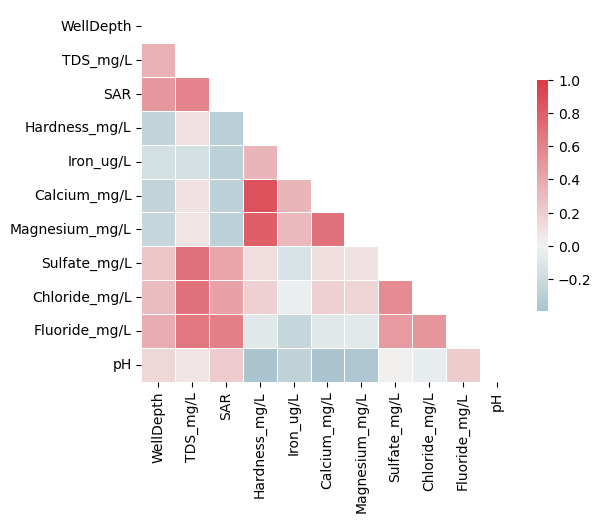

In [15]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

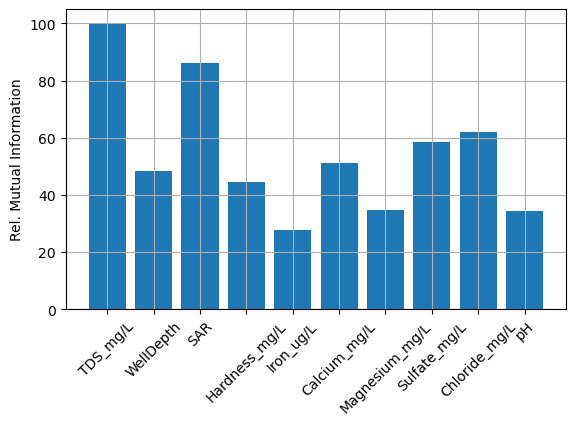

In [16]:
# Compute Mutual Information Criteria
from sklearn.feature_selection import mutual_info_regression

Y = df_variable['Fluoride_mg/L'] # Fluoride is the Y variable
X_columns = ['TDS_mg/L','WellDepth','SAR','Hardness_mg/L','Iron_ug/L','Calcium_mg/L','Magnesium_mg/L','Sulfate_mg/L',
             'Chloride_mg/L','pH']
X = df_variable[X_columns] # slect other columns
MI = mutual_info_regression(X,Y)
MI = MI*100/np.max(MI)
cols = X_columns
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
ax.bar(cols,MI)
plt.ylabel('Rel. Mutual Information')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [17]:
# drop Iron
df_woodbine3 = df_woodbine.drop(['Iron_ug/L'], axis=1)
df_woodbine3.dropna(axis=0, how='any', inplace=True)
df_woodbine3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 1712101 to 4008301
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StateWellNumber  676 non-null    float64
 1   LatitudeDD       676 non-null    float64
 2   Dlat             676 non-null    float64
 3   Mlat             676 non-null    float64
 4   Slat             676 non-null    float64
 5   LongitudeDD      676 non-null    float64
 6   Dlong            676 non-null    float64
 7   Mlong            676 non-null    float64
 8   Slong            676 non-null    float64
 9   WellDepth        676 non-null    float64
 10  TDS_mg/L         676 non-null    float64
 11  SAR              676 non-null    float64
 12  Hardness_mg/L    676 non-null    float64
 13  Calcium_mg/L     676 non-null    float64
 14  Magnesium_mg/L   676 non-null    float64
 15  Sulfate_mg/L     676 non-null    float64
 16  Chloride_mg/L    676 non-null    float64
 17  Fluori

In [18]:
# Compute correlations and plot correlation matrix

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df_variable2 = df_woodbine3[df_woodbine3.columns[9:19]]

corr = df_variable2.corr(method='kendall')

display(corr)

,WellDepth,TDS_mg/L,SAR,Hardness_mg/L,Calcium_mg/L,Magnesium_mg/L,Sulfate_mg/L,Chloride_mg/L,Fluoride_mg/L,pH
WellDepth,1.000000,0.262964,0.519023,-0.386416,-0.387327,-0.354277,0.140283,0.166873,0.381307,0.310600
TDS_mg/L,0.262964,1.000000,0.511706,0.080008,0.073773,0.056960,0.697760,0.642922,0.594034,0.060864
SAR,0.519023,0.511706,1.000000,-0.398433,-0.391391,-0.372928,0.319684,0.322081,0.618302,0.327654
Hardness_mg/L,-0.386416,0.080008,-0.398433,1.000000,0.887413,0.800278,0.135722,0.204129,-0.174218,-0.481005
Calcium_mg/L,-0.387327,0.073773,-0.391391,0.887413,1.000000,0.706243,0.135561,0.199262,-0.181074,-0.481105
Magnesium_mg/L,-0.354277,0.056960,-0.372928,0.800278,0.706243,1.000000,0.114687,0.186859,-0.179108,-0.450048
Sulfate_mg/L,0.140283,0.697760,0.319684,0.135722,0.135561,0.114687,1.000000,0.523537,0.399632,-0.040846
Chloride_mg/L,0.166873,0.642922,0.322081,0.204129,0.199262,0.186859,0.523537,1.000000,0.399122,-0.084927
Fluoride_mg/L,0.381307,0.594034,0.618302,-0.174218,-0.181074,-0.179108,0.399632,0.399122,1.000000,0.254539
pH,0.310600,0.060864,0.327654,-0.481005,-0.481105,-0.450048,-0.040846,-0.084927,0.254539,1.000000


C:\Users\mengj\AppData\Local\Temp\ipykernel_4920\3331742946.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

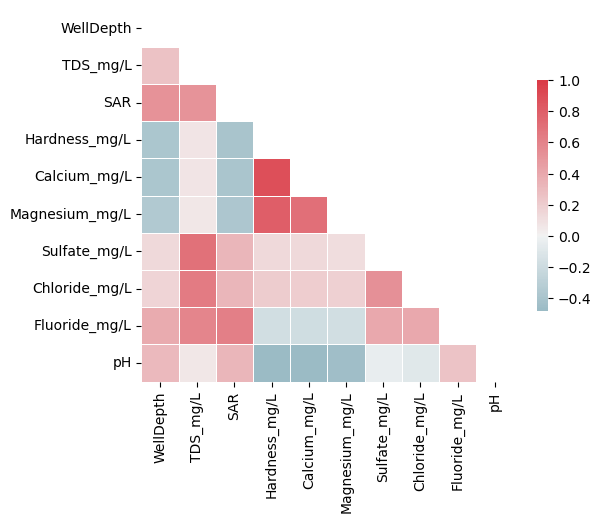

In [19]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

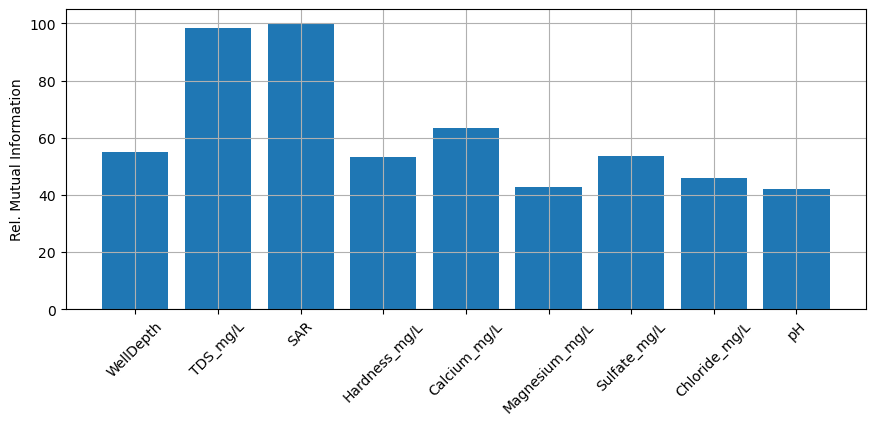

In [20]:
# Compute Mutual Information Criteria
from sklearn.feature_selection import mutual_info_regression

Y = df_variable2['Fluoride_mg/L'] # TDS is the Y variable
X_columns = ['WellDepth','TDS_mg/L','SAR','Hardness_mg/L','Calcium_mg/L','Magnesium_mg/L','Sulfate_mg/L',
             'Chloride_mg/L','pH']
X = df_variable2[X_columns] # slect other columns
MI = mutual_info_regression(X,Y)
MI = MI*100/np.max(MI)
cols = X_columns
fig = plt.figure(figsize=(8,3))
ax = fig.add_axes([0,0,1,1])
ax.bar(cols,MI)
plt.ylabel('Rel. Mutual Information')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [21]:
df_woodbine3.to_excel('C:/Users/mengj/OneDrive - lamar.edu/LectureNote2023/MLforCivilEng/TeamProject2/WoodbineData_final.xlsx')